# Part II - Data Analysis of Ford GoBike - San Francisco Bay Area
## Dasaprakash

## Investigation Overview


> This project involves data analysis of information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for the month of February 2019. The data is ingested first followed by data wrangling using Define-Code-Test methodolgy and then an exploratory data analysis is performed with univariate, bivariate and multivariate visualizations which are also aided by feature engineering of start time and end time. The technologies used are Python, Pandas, Numpy, Matplotlib, Seaborn.

> Some of the key insights are obtained are in the following areas:
> * Subscriber vs Customer distribution
> * The most busiest stations and least busiest stations where people onboarded
> * Behaviour of customers and subscribers during weekdays and weekends vs the frequency of rides
> * Behaviour of subscribers and customers during hours of the day vs the frequency of rides
> * At what time are the rides longer? Peak Time or other times?


## Dataset Overview

* duration_sec: Duration of the ride in seconds
* start_time: Start time of the ride
* end_time: End time of the ride
* start_station_id: Id of starting station
* start_station_name: Name of the starting station
* start_station_latitude: Latitude of starting station
* start_station_longitude: Longitude of starting station
* end_station_id: Id of end station
* end_station_name: Name of the end station
* end_station_latitude: Latitude of end station
* end_station_longitude: Longitude of end station
* bike_id: Id of the bike used for ride sharing
* user_type: Type of the user (Customer/Subscriber)
* member_birth_year: Birth year of the member or subscriber
* member_gender: Gender of the member or subscriber
* bike_share_for_all_trip: Boolean field which says if the bike is shared for the whole trip

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_test = pd.read_csv('df_clean.csv')
df_test.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour,weekday,day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,3,28
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,18,3,28
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,3,28
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17,3,28
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23,3,28


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Bike Ride User Type Percentage Comparison

> The dataset has a total of 183215 rides for the month of February 2019 taken by either Subscribers or Customers. The percentage of rides by customers 11% and by subscribers is 89% 

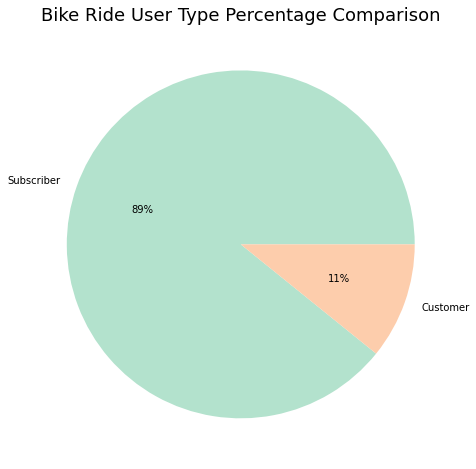

In [3]:
df_user_type = df_test.user_type.value_counts().reset_index()
df_user_type.columns = ['User Type', 'Count']
fig,ax = plt.subplots(figsize=(8,8))
colors = sns.color_palette('Pastel2')[0:5]
plt.pie(x=df_user_type['Count'], labels=df_user_type['User Type'], colors=colors, autopct='%.0f%%', )
plt.title('Bike Ride User Type Percentage Comparison', fontsize=18);
plt.show();

## 20 most busiest and least busiest 20 stations

> The 20 most busiest stations where people onboarded are:
> * Market St at 10th St
> * San Francisco Caltrain Station 2  (Townsend St at 4th St)
> * Berry St at 4th St
> * Montgomery St BART Station (Market St at 2nd St)
> * Powell St BART Station (Market St at 4th St)
> * San Francisco Ferry Building (Harry Bridges Plaza)
> * San Francisco Caltrain (Townsend St at 4th St)
> * Powell St BART Station (Market St at 5th St)
> * Howard St at Beale St
> * Steuart St at Market St

> * The Embarcadero at Sansome St
> * Bancroft Way at Telegraph Ave
> * Bancroft Way at College Ave
> * 2nd St at Townsend St
> * 3rd St at Townsend St
> * Embarcadero BART Station (Beale St at Market St)
> * Beale St at Harrison St
> * Civic Center/UN Plaza BART Station (Market St at McAllister St)
> * Townsend St at 7th St
> * 4th St at Mission Bay Blvd S

> The 20 least busiest stations where people onboarded are:
> * 16th St Depot
> * 21st Ave at International Blvd
> * Palm St at Willow St
> * Parker Ave at McAllister St
> * Willow St at Vine St
> * Taylor St at 9th St
> * Leavenworth St at Broadway
> * Backesto Park (Jackson St at 13th St)
> * Farnam St at Fruitvale Ave
> * 23rd Ave at Foothill Blvd

> * 26th Ave at International Blvd
> * San Pedro St at Hedding St
> * Foothill Blvd at 42nd Ave
> * Williams Ave at Apollo St
> * Empire St at 7th St
> * Oak St at 1st St
> * George St at 1st St
> * SAP Center
> * Almaden Blvd at Balbach St
> * Mission St at 1st St

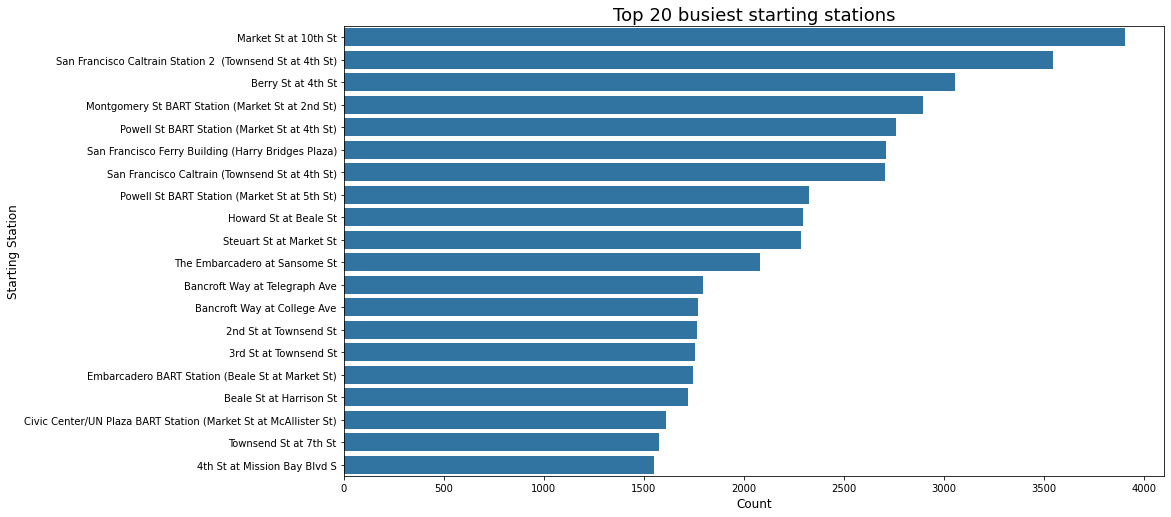

In [4]:
df_start_station = df_test['start_station_name'].value_counts()[:20].reset_index()
df_start_station.columns = ['Start_station', 'Count']
fig,ax = plt.subplots(figsize=(14.70, 8.27))
base_color = sns.color_palette()[0]
sns.barplot(x=df_start_station['Count'], y=df_start_station['Start_station'], color=base_color, orient='h')
plt.ylabel('Starting Station', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Top 20 busiest starting stations', fontsize=18)
plt.show();

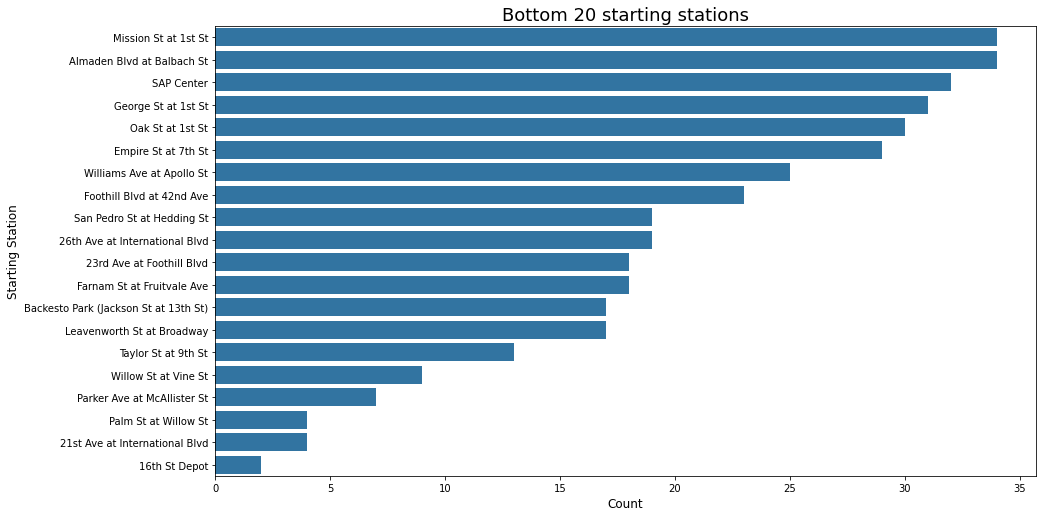

In [5]:
df_start_station = df_test['start_station_name'].value_counts()[-20:].reset_index()
df_start_station.columns = ['Start_station', 'Count']
fig,ax = plt.subplots(figsize=(14.70, 8.27))
base_color = sns.color_palette()[0]
sns.barplot(x=df_start_station['Count'], y=df_start_station['Start_station'], color=base_color, orient='h')
plt.ylabel('Starting Station', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Bottom 20 starting stations', fontsize=18)
plt.show();

## Behaviour of customers and subscribers during weekdays and weekends vs the frequency of rides

> The frequency of rides are more during weekdays than during weekends. The subscribers travel the same duration during both weekdays and weekends. However, the customers travel longer during weekends than during weekdays.

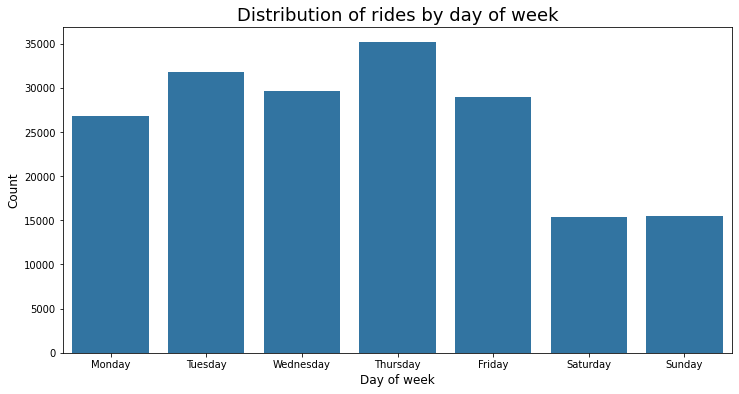

In [6]:
fig,ax = plt.subplots(figsize=(12,6))
base_color = sns.color_palette()[0]
sns.countplot(x=df_test['weekday'], color=base_color)
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of rides by day of week', fontsize=18)
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show();

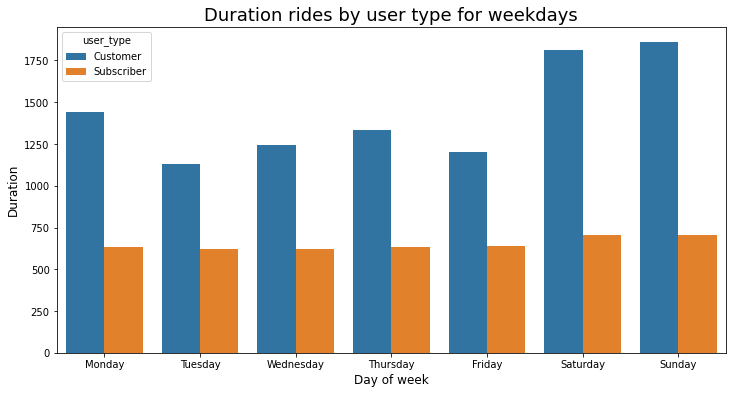

In [7]:
fig,ax = plt.subplots(figsize=(12,6))
base_color = sns.color_palette()[0]
sns.barplot(data=df_test, x='weekday', y='duration_sec', hue='user_type', ci=None)
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.title('Duration rides by user type for weekdays', fontsize=18)
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show();

## Behaviour of subscribers and customers during hours of the day vs the frequency of rides

> The frequency of rides are more during peak hours. The trips are longer during early hours than during peak hours.

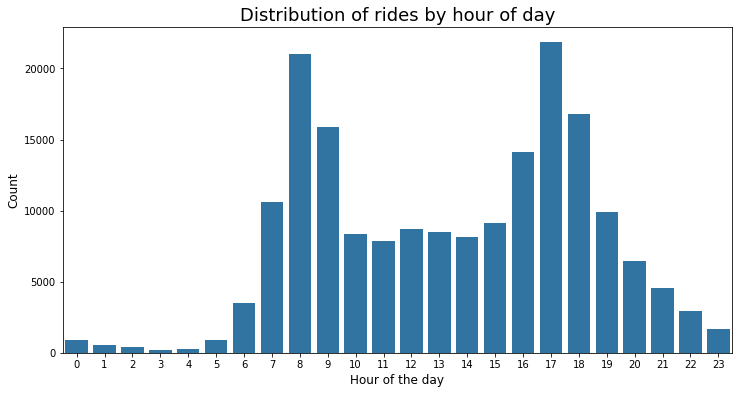

In [8]:
fig,ax = plt.subplots(figsize=(12,6))
base_color = sns.color_palette()[0]
sns.countplot(x=df_test['hour'], color=base_color)
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of rides by hour of day', fontsize=18)
plt.show();

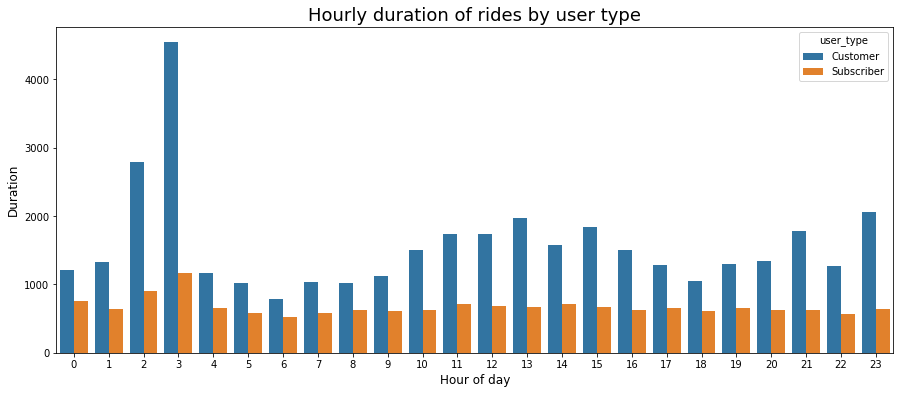

In [9]:
fig,ax = plt.subplots(figsize=(15,6))
base_color = sns.color_palette()[0]
sns.barplot(data=df_test, x='hour', y='duration_sec', hue='user_type', ci=None)
plt.xlabel('Hour of day', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.title('Hourly duration of rides by user type', fontsize=18)
plt.show();

## At what time are the rides longer? Peak time or other times?

> The rides are longer between 2AM and 4AM than during peak hours.

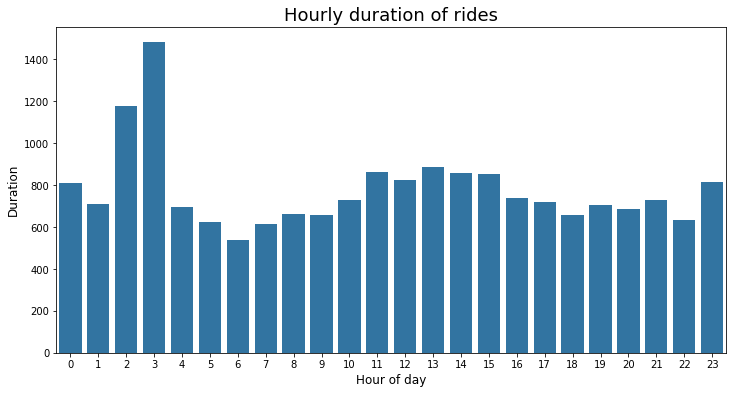

In [10]:
fig,ax = plt.subplots(figsize=(12,6))
base_color = sns.color_palette()[0]
sns.barplot(data=df_test, x='hour', y='duration_sec', color=base_color, ci=None)
plt.xlabel('Hour of day', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.title('Hourly duration of rides', fontsize=18)
plt.show();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_explanatory_analysis_bike_data.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_explanatory_analysis_bike_data.ipynb to slides
[NbConvertApp] Writing 811269 bytes to Part_II_explanatory_analysis_bike_data.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_explanatory_analysis_bike_data.slides.html
Use Control-C to stop this server


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
